### Challenge: sentiment analysis with Naive bayes

In [1]:
#### import necessary files

%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
### # Grab and process the raw data.
data_path = ("./sentiment_labelled_sentences/amazon_cells_labelled.txt")
sentiment_raw = pd.read_csv(data_path, delimiter= '\t', header=None)
sentiment_raw.columns = ['message', 'sentiment']

In [3]:
sentiment_raw

,message,sentiment
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
...,...,...
995,The screen does get smudged easily because it ...,0
996,What a piece of junk.. I lose more calls on th...,0
997,Item Does Not Match Picture.,0
998,The only thing that disappoint me is the infra...,0


### MAGDA: 
- What do we do now? Do we pick out some keywords that would be good vs bad?

In [4]:
sentiment_raw_negetive = sentiment_raw.copy()
### I looked at the data and thought these keywords are associated with bad sentiment

keywords = ['problem', 'waste', 'poor',
          'no', 'bad', 'failed', 'don\'t','wouldn\'t']

### lets look at the message and see if the message has any of these words. if they do, possibility of spam
for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    sentiment_raw_negetive[str(key)] = sentiment_raw_negetive.message.str.contains(
        str(key),
        case=False
    )

In [5]:
### all upper case is negetive sentiment. People are angry when they type uppercase
### is themessage all uppercase?
sentiment_raw_negetive['allcaps'] = sentiment_raw_negetive.message.str.isupper()

In [6]:
# sentiment_raw_negetive

In [7]:
sentiment_raw_negetive['allcaps'].value_counts()

False    985
True      15
Name: allcaps, dtype: int64

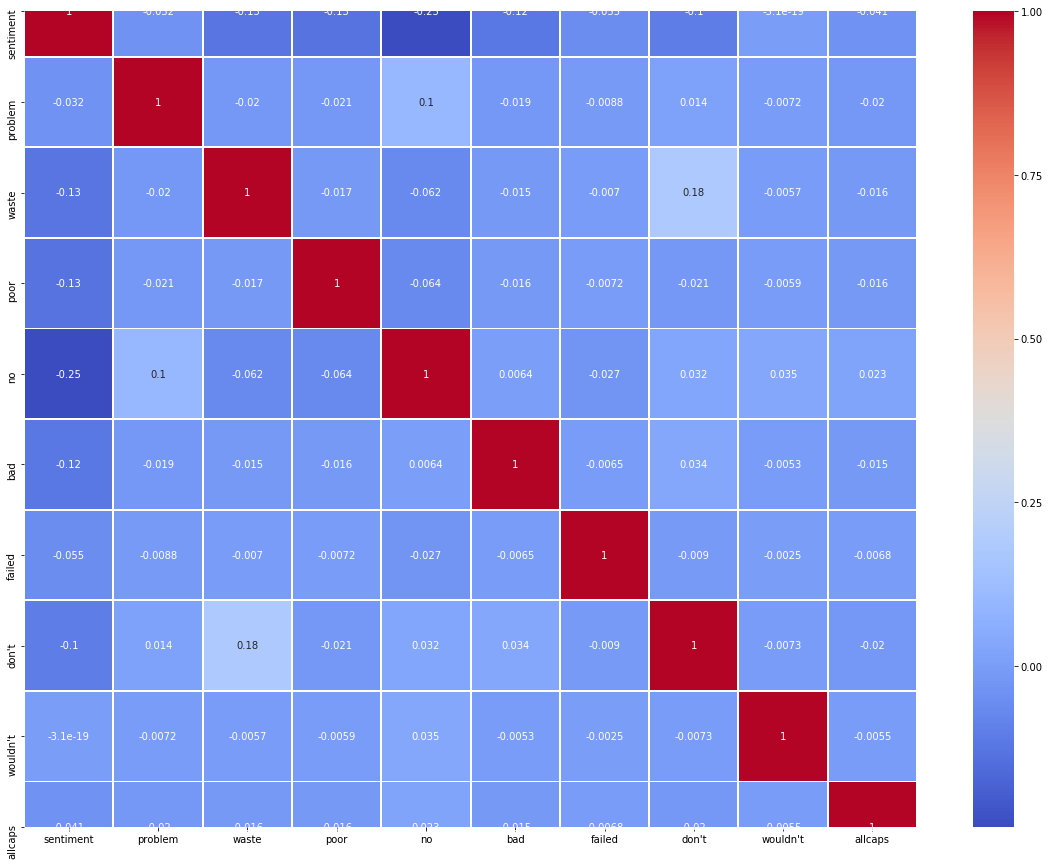

In [8]:
plt.figure(figsize=(20,15))
sns.heatmap(sentiment_raw_negetive.corr(), linewidth=1,annot=True,cmap='coolwarm')
plt.show()

### Positive sentiment

In [9]:
sentiment_raw_positive = sentiment_raw.copy()
sentiment_raw_positive['message'] = sentiment_raw_positive['message'].str.lower()
### I looked at the data and thought these keywords are associated with bad sentiment

keywords_pos = ['great', 'excellent', 'good', 'love']

### lets look at the message and see if the message has any of these words. if they do, possibility of spam
for key in keywords_pos:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    sentiment_raw_positive[str(key)] = sentiment_raw_positive.message.str.contains(
        str(key),
        case=False
    )


In [10]:
# sentiment_raw_positive

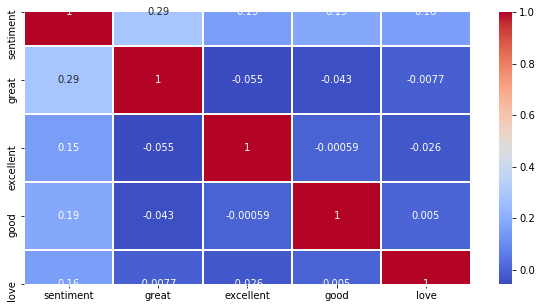

In [11]:
plt.figure(figsize=(10,5))
sns.heatmap(sentiment_raw_positive.corr(), linewidth=1,annot=True,cmap='coolwarm')
plt.show()

### Magda: This negetive data looks very independent - maybe I did not pick the words correctly?

In [12]:
### ### Training data
# SKLearn required you to specify an outcome (y or dependent variable) 
# and your inputs (x or independent variables). 
# We'll do that below under the titles data and target.

data = sentiment_raw_negetive[keywords + ['allcaps']]
target = sentiment_raw_negetive['sentiment']

In [13]:
data_pos = sentiment_raw_positive[keywords_pos]
target_pos = sentiment_raw_positive['sentiment']

### Create Model

In [14]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 348


In [15]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data_pos, target_pos)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data_pos)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data_pos.shape[0],
    (target_pos != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 325


## Magda Questions: 
-  what does it mean by the result above? Number of mislabeled points out of a total 1000 points : 348?
- Number of mislabeled points out of a total 1000 points : 325 (positive data)

- How do I know if this is right?

### Test it on one of the other datasets to see how well these kinds of classifiers translate from one context to another.
- Yelp Data

In [16]:
### # Grab and process the raw data.
data_path_2 = ("./sentiment_labelled_sentences/yelp_labelled.txt")
sentiment_raw_2 = pd.read_csv(data_path_2, delimiter= '\t', header=None)
sentiment_raw_2.columns = ['message', 'sentiment']

In [17]:
sentiment_raw_2

,message,sentiment
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [18]:
sentiment_raw_negetive_2 = sentiment_raw_2.copy()
### I looked at the data and thought these keywords are associated with bad sentiment

keywords_2 = ['problem', 'waste', 'poor',
          'no', 'bad', 'failed', 'don\'t','wouldn\'t']

### lets look at the message and see if the message has any of these words. if they do, possibility of spam
for key in keywords_2:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    sentiment_raw_negetive_2[str(key)] = sentiment_raw_negetive_2.message.str.contains(
        str(key),
        case=False
    )

sentiment_raw_negetive_2['allcaps'] = sentiment_raw_negetive_2.message.str.isupper()

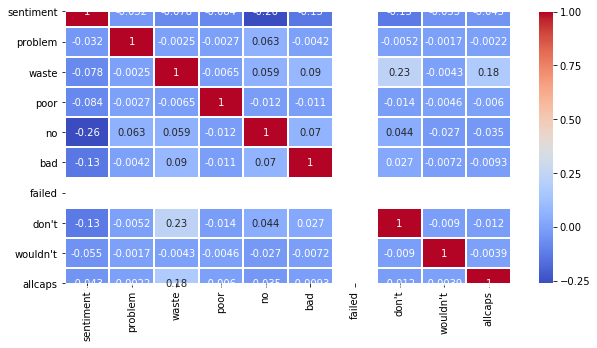

In [19]:
plt.figure(figsize=(10,5))
sns.heatmap(sentiment_raw_negetive_2.corr(), linewidth=1,annot=True,cmap='coolwarm')
plt.show()

In [20]:
data_2 = sentiment_raw_negetive_2[keywords + ['allcaps']]
target_2 = sentiment_raw_negetive_2['sentiment']

In [21]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data_2, target_2)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data_2)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data_2.shape[0],
    (target_2 != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 359


## Magda Questions: 
-  what does it mean by the result above? Number of mislabeled points out of a total 1000 points : 359 - and this is in compare to "Number of mislabeled points out of a total 1000 points : 348?" from the Amazon data

- Number of mislabeled points out of a total 1000 points : 325 (positive data)

- How do I know if this is right?

In [22]:
###imdb_labelled.txt
### # Grab and process the raw data.
data_path_3 = ("./sentiment_labelled_sentences/imdb_labelled.txt")
sentiment_raw_3 = pd.read_csv(data_path_3, delimiter= '\t', header=None)
sentiment_raw_3.columns = ['message', 'sentiment']